In [1]:
'''
By “group by” we are referring to a process involving one or more of the following steps:

Splitting the data into groups based on some criteria.

Applying a function to each group independently.

Combining the results into a data structure.


'''
print("Group by: split-apply-combine 과제")

Group by: split-apply-combine 과제


In [2]:
import pandas as pd
import numpy as np

In [4]:
#Splitting an object into groups
speeds = pd.DataFrame(
    [
        ("bird", "Falconiformes", 389.0),
        ("bird", "Psittaciformes", 24.0),
        ("mammal", "Carnivora", 80.2),
        ("mammal", "Primates", np.nan),
        ("mammal", "Carnivora", 58),
    ],
    index=["falcon", "parrot", "lion", "monkey", "leopard"],
    columns=("class", "order", "max_speed"),
)
speeds

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [6]:
grouped = speeds.groupby("class")
print(grouped)

In [7]:
grouped = speeds.groupby(["class", "order"])
print(grouped)

In [8]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,-1.247274,0.109323
1,bar,one,0.679720,0.852421
2,foo,two,-0.748605,2.448066
3,bar,three,-1.544841,1.750324
4,foo,two,-2.519060,2.318851
5,bar,two,0.374384,-1.195306
6,foo,one,-0.913617,1.077661
7,foo,three,-0.705805,-0.034525


In [10]:
grouped = df.groupby("A")
print(grouped)

In [11]:
grouped = df.groupby("B")
print(grouped)

In [12]:
grouped = df.groupby(["A", "B"])
print(grouped)

In [13]:
df2 = df.set_index(["A", "B"])
grouped = df2.groupby(level=df2.index.names.difference(["B"]))
grouped.sum()

,C,D
A,,
bar,-0.490737,1.407439
foo,-6.134360,5.919376


In [15]:
def get_letter_type(letter):
    if letter.lower() in 'aeiou':
        return 'vowel'
    else:
        return 'consonant'
grouped = df.T.groupby(get_letter_type)
print(grouped)

In [18]:
index = [1, 2, 3, 1, 2, 3]
s = pd.Series([1, 2, 3, 10, 20, 30], index=index)
s

1     1
2     2
3     3
1    10
2    20
3    30
dtype: int64

In [19]:
grouped = s.groupby(level=0)

grouped.first()


1    1
2    2
3    3
dtype: int64

In [20]:
grouped.last()

1    10
2    20
3    30
dtype: int64

In [21]:
grouped.sum()

1    11
2    22
3    33
dtype: int64

# GroupBy sorting

In [22]:
df2 = pd.DataFrame({"X": ["B", "B", "A", "A"], "Y": [1, 2, 3, 4]})

In [23]:
df2.groupby(["X"]).sum()

,Y
X,
A,7
B,3


In [24]:
df2.groupby(["X"], sort=False).sum()

,Y
X,
B,3
A,7


In [25]:
df3 = pd.DataFrame({"X": ["A", "B", "A", "B"], "Y": [1, 4, 3, 2]})

In [26]:
df3.groupby("X").get_group("A")

,X,Y
0,A,1
2,A,3


In [27]:
df3.groupby(["X"]).get_group(("B",))

,X,Y
1,B,4
3,B,2


# GroupBy dropna

In [30]:
df_list = [[1, 2, 3], [1, None, 4], [2, 1, 3], [1, 2, 2]]

df_dropna = pd.DataFrame(df_list, columns=["a", "b", "c"])

df_dropna
'''
   a    b  c
0  1  2.0  3
1  1  NaN  4
2  2  1.0  3
3  1  2.0  2
'''
df_dropna

,a,b,c
0,1,2.0,3
1,1,NaN,4
2,2,1.0,3
3,1,2.0,2


# GroupBy object attributes

In [32]:
n = 10

weight = np.random.normal(166, 20, size=n)

height = np.random.normal(60, 10, size=n)

time = pd.date_range("1/1/2000", periods=n)

gender = np.random.choice(["male", "female"], size=n)

df = pd.DataFrame(    {"height": height, "weight": weight, "gender": gender}, index=time )
   

df
'''
               height      weight  gender
2000-01-01  42.849980  157.500553    male
2000-01-02  49.607315  177.340407    male
2000-01-03  56.293531  171.524640    male
2000-01-04  48.421077  144.251986  female
2000-01-05  46.556882  152.526206    male
2000-01-06  68.448851  168.272968  female
2000-01-07  70.757698  136.431469    male
2000-01-08  58.909500  176.499753  female
2000-01-09  76.435631  174.094104  female
2000-01-10  45.306120  177.540920    male'''
df
Igb = df.groupby("gender")
df

,height,weight,gender
2000-01-01,36.965888,195.145036,male
2000-01-02,57.171728,122.545209,female
2000-01-03,51.241830,173.275965,male
2000-01-04,65.853663,170.072319,female
2000-01-05,55.693803,151.671639,male
2000-01-06,64.403414,156.041977,male
2000-01-07,51.816266,187.278921,female
2000-01-08,70.995235,160.331335,male
2000-01-09,41.669765,198.874425,female
2000-01-10,59.374200,170.598136,male


In [ ]:
#GroupBy with MultiIndex

In [33]:
arrays = [
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
     ["one", "two", "one", "two", "one", "two", "one", "two"],
 ]


index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])

s = pd.Series(np.random.randn(8), index=index)


'''
first  second
bar    one      -0.919854
       two      -0.042379
baz    one       1.247642
       two      -0.009920
foo    one       0.290213
       two       0.495767
qux    one       0.362949
       two       1.548106
dtype: float64'''
s

first  second
bar    one       1.309467
       two      -0.178594
baz    one       1.760946
       two      -0.448695
foo    one      -1.036565
       two      -0.893868
qux    one       1.091529
       two      -0.992082
dtype: float64

In [ ]:
#Grouping DataFrame with Index levels and column

In [34]:
arrays = [
  ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
 ["one", "two", "one", "two", "one", "two", "one", "two"],
 ]


index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])

df = pd.DataFrame({"A": [1, 1, 1, 1, 2, 2, 3, 3], "B": np.arange(8)}, index=index)
df
'''
              A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3
foo   one     2  4
      two     2  5
qux   one     3  6
      two     3  7
'''
df

A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3
foo   one     2  4
      two     2  5
qux   one     3  6
      two     3  7

In [ ]:
#DataFrame column selection in GroupBy

In [35]:
df = pd.DataFrame(
    {
  "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
 "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
 "C": np.random.randn(8),
  "D": np.random.randn(8),
    }
 )
  

df
'''
     A      B         C         D
0  foo    one -0.575247  1.346061
1  bar    one  0.254161  1.511763
2  foo    two -1.143704  1.627081
3  bar  three  0.215897 -0.990582
4  foo    two  1.193555 -0.441652
5  bar    two -0.077118  1.211526
6  foo    one -0.408530  0.268520
7  foo  three -0.862495  0.024580
'''
grouped = df.groupby(["A"])

grouped_C = grouped["C"]

grouped_D = grouped["D"]

In [37]:
print(grouped)

In [38]:
print(grouped_C)

In [39]:
print(grouped_D)

In [ ]:
#Iterating through groups

In [40]:
grouped = df.groupby('A')

for name, group in grouped:
    print(name)
    print(group)


'''
bar
     A      B         C         D
1  bar    one  0.254161  1.511763
3  bar  three  0.215897 -0.990582
5  bar    two -0.077118  1.211526
foo
     A      B         C         D
0  foo    one -0.575247  1.346061
2  foo    two -1.143704  1.627081
4  foo    two  1.193555 -0.441652
6  foo    one -0.408530  0.268520
7  foo  three -0.862495  0.024580'''


bar
     A      B         C         D
1  bar    one -1.469209  0.793032
3  bar  three -1.510593  0.961932
5  bar    two -0.269064  0.328493
foo
     A      B         C         D
0  foo    one -1.991239  1.746791
2  foo    two  1.203109  0.201622
4  foo    two -0.470819  0.996923
6  foo    one -0.098078  1.619978
7  foo  three  1.058656 -2.369808


'\nbar\n     A      B         C         D\n1  bar    one  0.254161  1.511763\n3  bar  three  0.215897 -0.990582\n5  bar    two -0.077118  1.211526\nfoo\n     A      B         C         D\n0  foo    one -0.575247  1.346061\n2  foo    two -1.143704  1.627081\n4  foo    two  1.193555 -0.441652\n6  foo    one -0.408530  0.268520\n7  foo  three -0.862495  0.024580'

In [ ]:
#Selecting a group

In [41]:
 grouped.get_group("bar")
'''
     A      B         C         D
1  bar    one  0.254161  1.511763
3  bar  three  0.215897 -0.990582
5  bar    two -0.077118  1.211526'''



'\n    A      B         C         D\n1  bar    one  0.254161  1.511763\n3  bar  three  0.215897 -0.990582\n5  bar    two -0.077118  1.211526'

In [ ]:
#Aggregation

In [43]:
animals = pd.DataFrame(
    {
        "kind": ["cat", "dog", "cat", "dog"],
        "height": [9.1, 6.0, 9.5, 34.0],
        "weight": [7.9, 7.5, 9.9, 198.0],
    }
)
animals

,kind,height,weight
0,cat,9.1,7.9
1,dog,6.0,7.5
2,cat,9.5,9.9
3,dog,34.0,198.0


In [ ]:
#Built-in aggregation methods

In [44]:
df.groupby("A")[["C", "D"]].max()

,C,D
A,,
bar,-0.269064,0.961932
foo,1.203109,1.746791


In [45]:
df.groupby(["A", "B"]).mean()

C         D
A   B                        
bar one   -1.469209  0.793032
    three -1.510593  0.961932
    two   -0.269064  0.328493
foo one   -1.044659  1.683384
    three  1.058656 -2.369808
    two    0.366145  0.599273

In [46]:
np.random.seed(1234)

df = pd.DataFrame(np.random.randn(50, 2))

df["g"] = np.random.choice(["A", "B"], size=50)

df.loc[df["g"] == "B", 1] += 3

A         Axes(0.1,0.15;0.363636x0.75)
B    Axes(0.536364,0.15;0.363636x0.75)
dtype: object

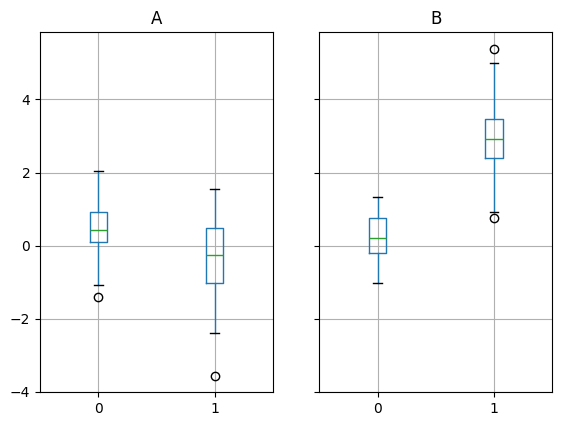

In [47]:
df.groupby("g").boxplot()

In [49]:
n=1000
df = pd.DataFrame(
    {
        "Store": np.random.choice(["Store_1", "Store_2"], n),
        "Product": np.random.choice(["Product_1", "Product_2"], n),
        "Revenue": (np.random.random(n) * 50 + 10).round(2),
        "Quantity": np.random.randint(1, 10, size=n),
    }
)
df.head(2)

,Store,Product,Revenue,Quantity
0,Store_1,Product_1,33.19,5
1,Store_2,Product_2,52.56,8
